In [1]:
import healpy as hp
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import minimize
#import pandas as pd

0

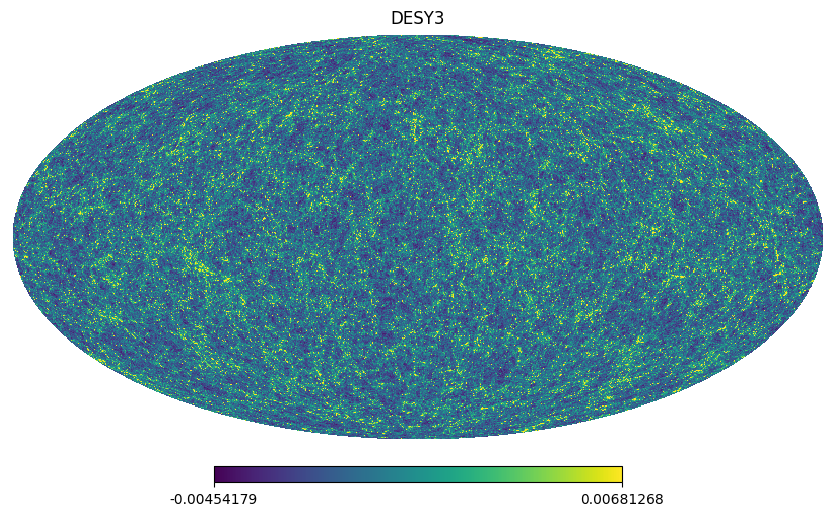

In [2]:
# number of grids
n_side = 256
n_pix = hp.nside2npix(n_side)  # pixel size

n_side = 256  # number of grids
n_pix = hp.nside2npix(n_side)  # pixel size

'''
def array_maker(filename):
    with open(filename, 'r') as f:
        dummy = np.fromfile(f, dtype="int32", count=1)
        array_use = np.fromfile(f, dtype="float", count=12 * n_side)

    return array_use
'''

file_des = "desy3_bin0_nside256.npy"
# healpix_map = hp.read_map('desy3_bin0_nside256.npy')
healpix_map = np.load(file_des)

healpix_STD = np.std(healpix_map)
healpix_max = 3 * healpix_STD
healpix_min=-2. * healpix_STD
hp.visufunc.mollview(healpix_map, max=healpix_max, min=healpix_min, title='DESY3', cmap='viridis')

np.isnan(healpix_map).sum()

In [3]:
initial_variance_healpix = healpix_map.var()


initial_mean = healpix_map.mean()

HEALPIX_MIN = healpix_map.min()
initial_shift = -1.5 * HEALPIX_MIN
initial_std_dev_y = math.sqrt(math.log(1 + initial_variance_healpix/initial_shift ** 2))

initial_guess = np.array([initial_std_dev_y, initial_shift])

print("HEALPIX_MIN: %2.5f" % HEALPIX_MIN)
print("Initial Mean: %2.5f" % initial_mean)
print("Initial Shift %2.5f" % initial_shift)

HEALPIX_MIN: -0.00434
Initial Mean: 0.00000
Initial Shift 0.00650


In [4]:
def objective_function(params, y):
    std_dev, shift = params
    if shift < -HEALPIX_MIN:
        return np.inf

    mean = math.log(shift) - (std_dev ** 2) / 2  # for Kappa Maps
    x = np.log(y + shift)
    least_error = np.sum(((math.log(std_dev ** 2)) / 2) + x + ((x - mean) ** 2) / (2 * (std_dev ** 2)))
    return least_error

result = minimize(objective_function, initial_guess, args=(healpix_map,))
optimized_std_dev, optimized_shift = result.x
optimized_mean = math.log(optimized_shift) - (optimized_std_dev ** 2) / 2

print("Optimized Mean:", optimized_mean)
print("Optimized Standard Deviation:", optimized_std_dev)
print("Optimized Shift:", optimized_shift)

/home/namit28/.local/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/namit28/.local/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/namit28/.local/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Optimized Mean: -5.525510929250059
Optimized Standard Deviation: 0.44683450716403084
Optimized Shift: 0.0044020700144727426


In [5]:
'''
# For Kappa1:

def objective_function_K1(params, K1):
    std_dev, shift = params
    if shift < -HEALPIX_MIN:
        return np.inf

    mean = math.log(shift) - (std_dev ** 2) / 2  # for Kappa Maps
    x = np.log(K1 - shift)
    least_error = np.sum(((math.log(2 * math.pi * std_dev ** 2)) / 2) + x + ((x - mean) ** 2) / (2 * (std_dev ** 2)))
    return least_error


result = minimize(objective_function_K1, initial_guess, args=(healpix_map,))  # Change arguments from healpix_map to Kappa1
optimized_std_dev_K1, optimized_shift_K1 = result.x
optimized_mean_K1 = math.log(optimized_shift_K1) - (optimized_std_dev_K1 ** 2) / 2



# For Kappa2:

def objective_function_K2(params, K2):
    std_dev, shift = params
    if shift < -HEALPIX_MIN:
        return np.inf

    mean = math.log(shift) - (std_dev ** 2) / 2  # for Kappa Maps
    x = np.log(K2 - shift)
    least_error = np.sum(((math.log(2 * math.pi * std_dev ** 2)) / 2) + x + (((x - mean) ** 2) / (2 * ((std_dev ** 2) * (a ** 2)))) + math.log(a))
    return least_error


result = minimize(objective_function_K2, initial_guess, args=(healpix_map,))  # Change arguments from healpix_map to Kappa2
optimized_std_dev_K2, optimized_shift_K2 = result.x
optimized_mean_K2 = math.log(optimized_shift_K2) - (optimized_std_dev_K2 ** 2) / 2
'''

'\n# For Kappa1:\n\ndef objective_function_K1(params, K1):\n    std_dev, shift = params\n    if shift < -HEALPIX_MIN:\n        return np.inf\n\n    mean = math.log(shift) - (std_dev ** 2) / 2  # for Kappa Maps\n    x = np.log(K1 - shift)\n    least_error = np.sum(((math.log(2 * math.pi * std_dev ** 2)) / 2) + x + ((x - mean) ** 2) / (2 * (std_dev ** 2)))\n    return least_error\n\n\nresult = minimize(objective_function_K1, initial_guess, args=(healpix_map,))  # Change arguments from healpix_map to Kappa1\noptimized_std_dev_K1, optimized_shift_K1 = result.x\noptimized_mean_K1 = math.log(optimized_shift_K1) - (optimized_std_dev_K1 ** 2) / 2\n\n\n\n# For Kappa2:\n\ndef objective_function_K2(params, K2):\n    std_dev, shift = params\n    if shift < -HEALPIX_MIN:\n        return np.inf\n\n    mean = math.log(shift) - (std_dev ** 2) / 2  # for Kappa Maps\n    x = np.log(K2 - shift)\n    least_error = np.sum(((math.log(2 * math.pi * std_dev ** 2)) / 2) + x + (((x - mean) ** 2) / (2 * ((std_de

In [6]:
'''
print("Optimized Mean Kappa 1:", optimized_mean_K1)
print("Optimized Standard Deviation Kappa 1:", optimized_std_dev_K1)
print("Optimized Shift Kappa 1:", optimized_shift_K1)

print("Optimized Mean Kappa 2:", optimized_mean_K2)
print("Optimized Standard Deviation Kappa 2:", optimized_std_dev_K2)
print("Optimized Shift Kappa 2:", optimized_shift_K2)
'''

'\nprint("Optimized Mean Kappa 1:", optimized_mean_K1)\nprint("Optimized Standard Deviation Kappa 1:", optimized_std_dev_K1)\nprint("Optimized Shift Kappa 1:", optimized_shift_K1)\n\nprint("Optimized Mean Kappa 2:", optimized_mean_K2)\nprint("Optimized Standard Deviation Kappa 2:", optimized_std_dev_K2)\nprint("Optimized Shift Kappa 2:", optimized_shift_K2)\n'

/tmp/ipykernel_548/404355401.py:34: RuntimeWarning: invalid value encountered in log
  y1 = np.log(K1 + optimized_shift)
/tmp/ipykernel_548/404355401.py:41: RuntimeWarning: invalid value encountered in log
  y2 = (1/a) * np.log(K2 + new_shift)


P_K1: 0.9998658170783669
P_K2: 1.1340291171390955e-07
P_K: 0.49993296524063924


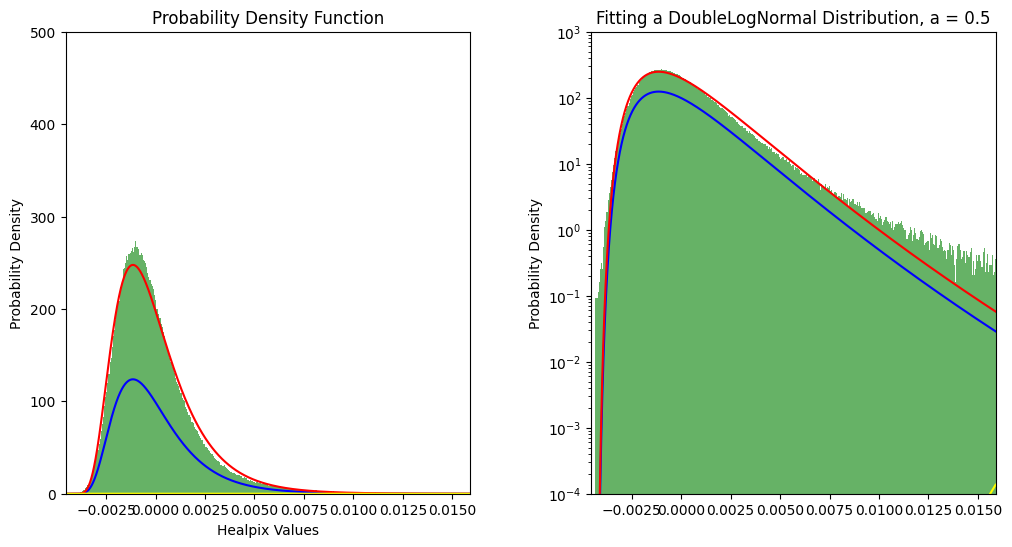

P_K1: 0.9998658170783669
P_K2: 0.012152515128716597
P_K: 0.5060091661035416


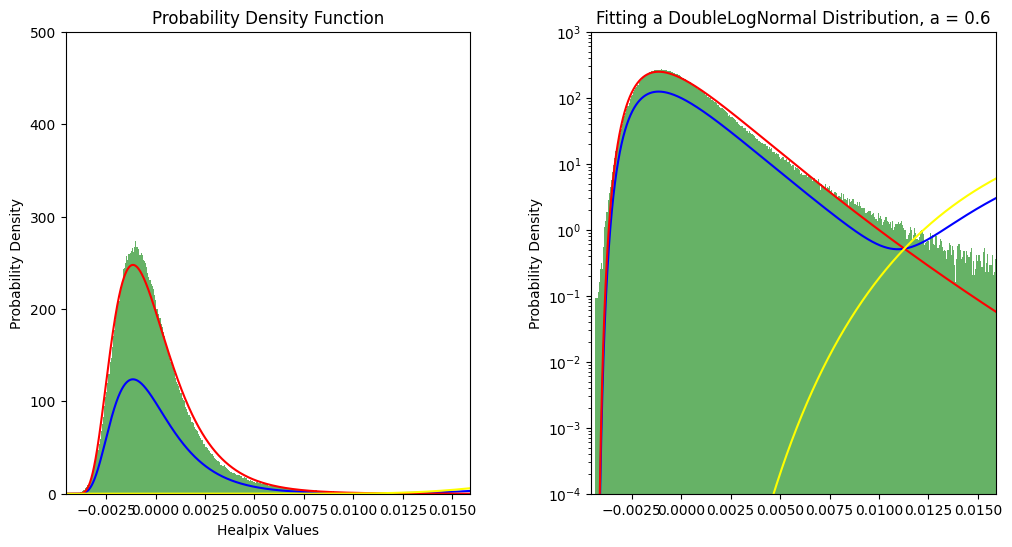

P_K1: 0.9998658170783669
P_K2: 0.43488033421933237
P_K: 0.7173730756488496


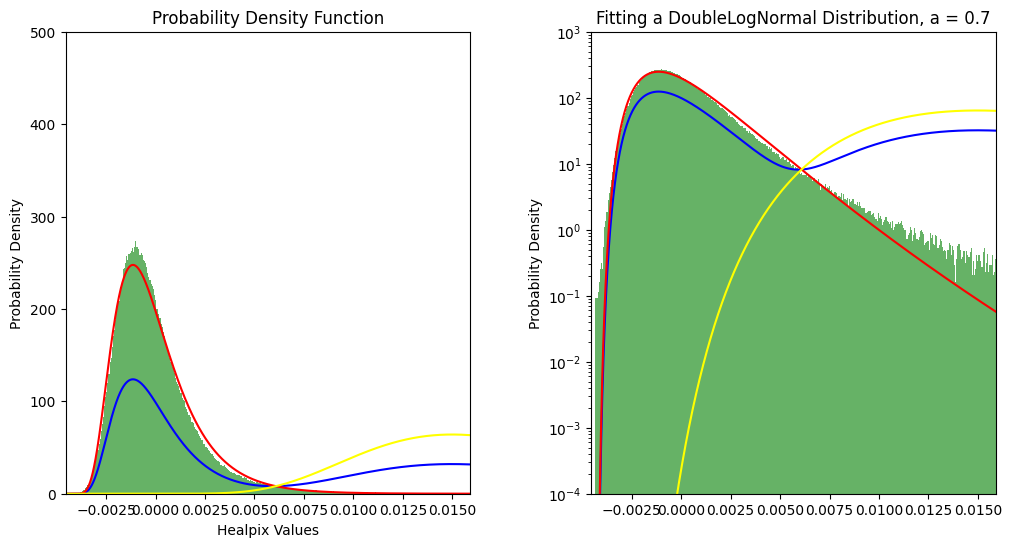

P_K1: 0.9998658170783669
P_K2: 0.9195827319669584
P_K: 0.9597242745226625


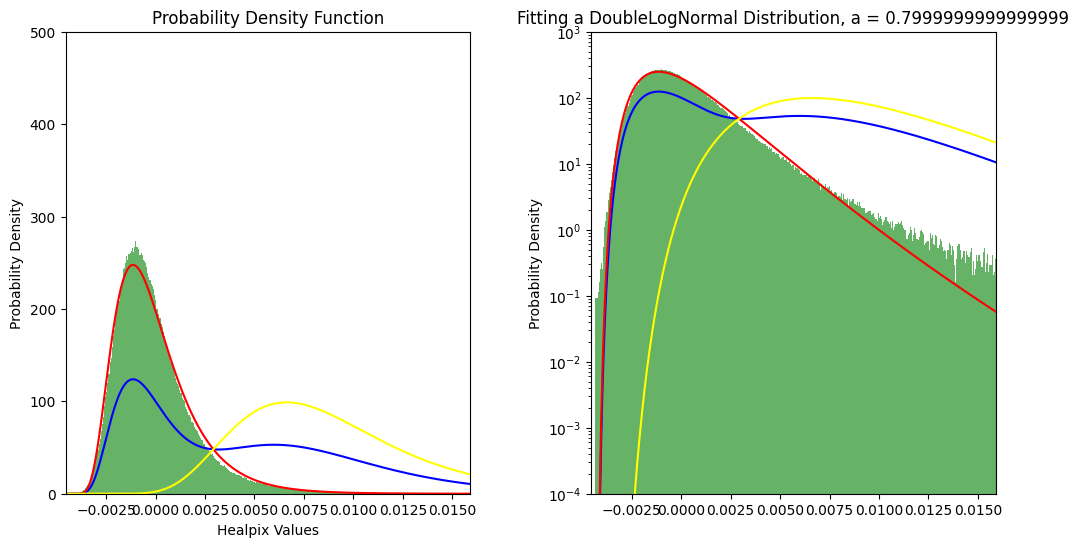

P_K1: 0.9998658170783669
P_K2: 0.9956093280423867
P_K: 0.9977375725603768


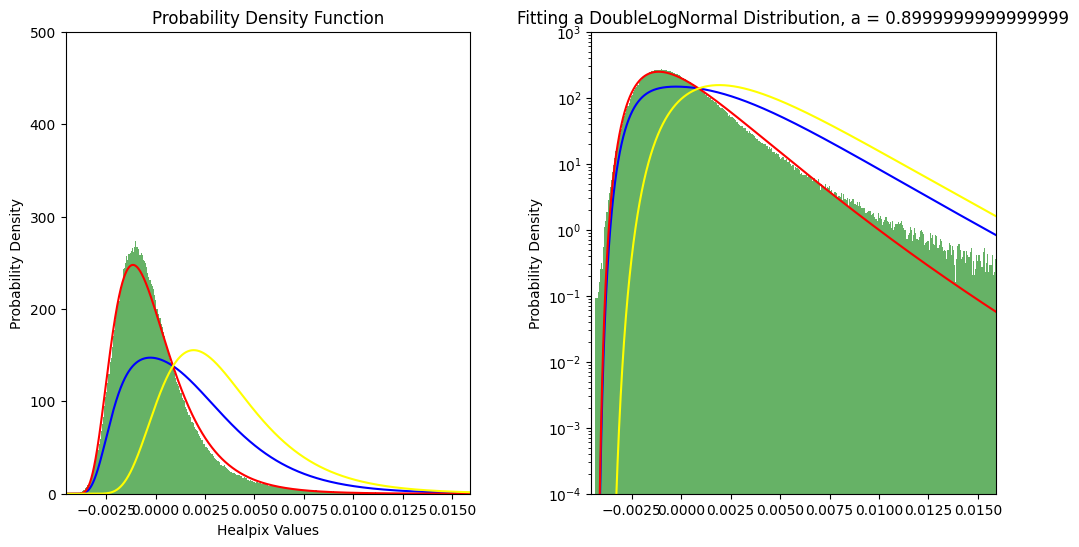

P_K1: 0.9998658170783669
P_K2: 0.999837801907305
P_K: 0.9998518094928359


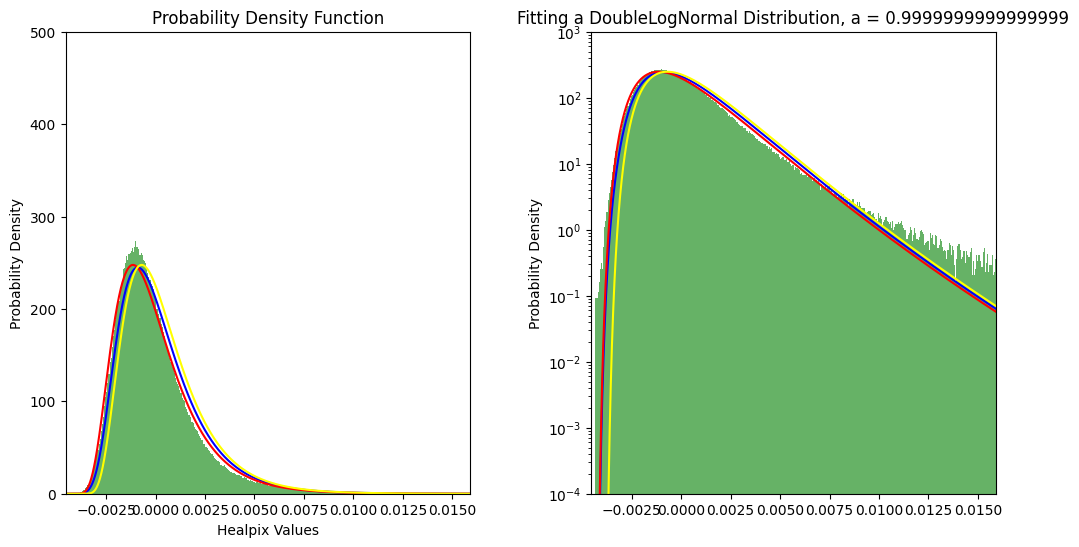

P_K1: 0.9998658170783669
P_K2: 0.9999943934314158
P_K: 0.9999301052548913


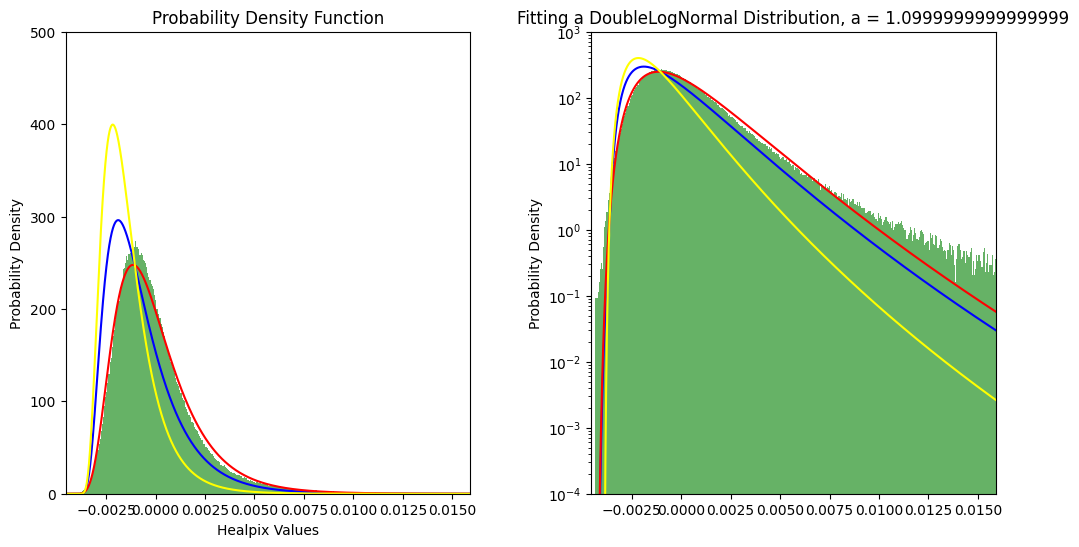

P_K1: 0.9998658170783669
P_K2: 0.99999978684024
P_K: 0.9999328019593035


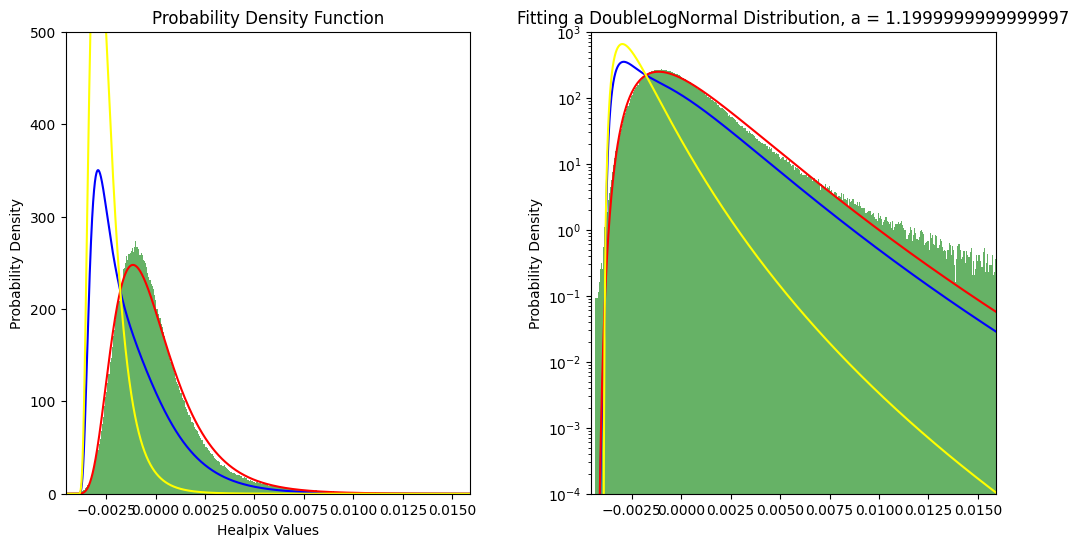

P_K1: 0.9998658170783669
P_K2: 0.999999990399544
P_K: 0.9999329037389553


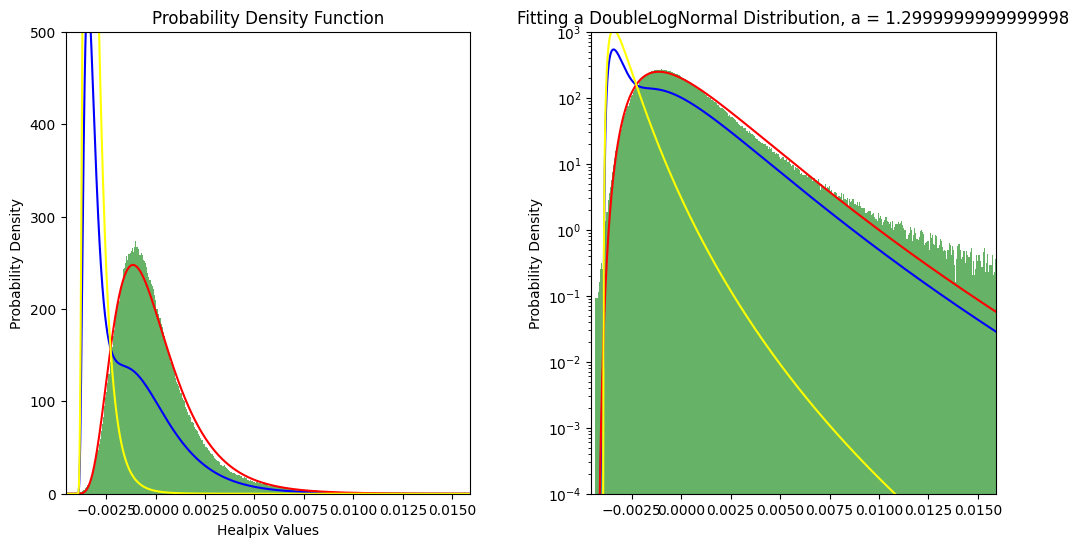

P_K1: 0.9998658170783669
P_K2: 0.9999999994728627
P_K: 0.9999329082756149


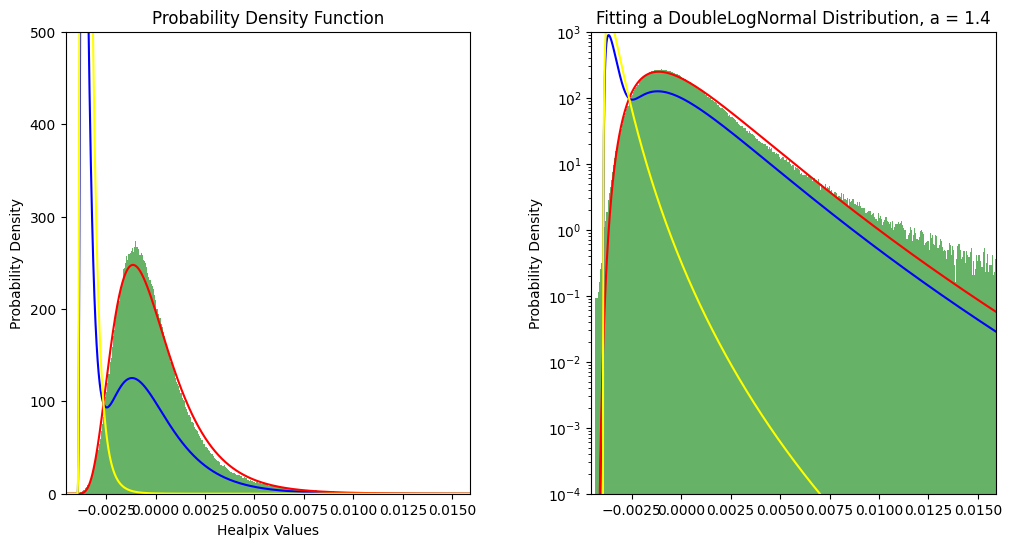

P_K1: 0.9998658170783669
P_K2: 0.99999999996466
P_K: 0.9999329085215133


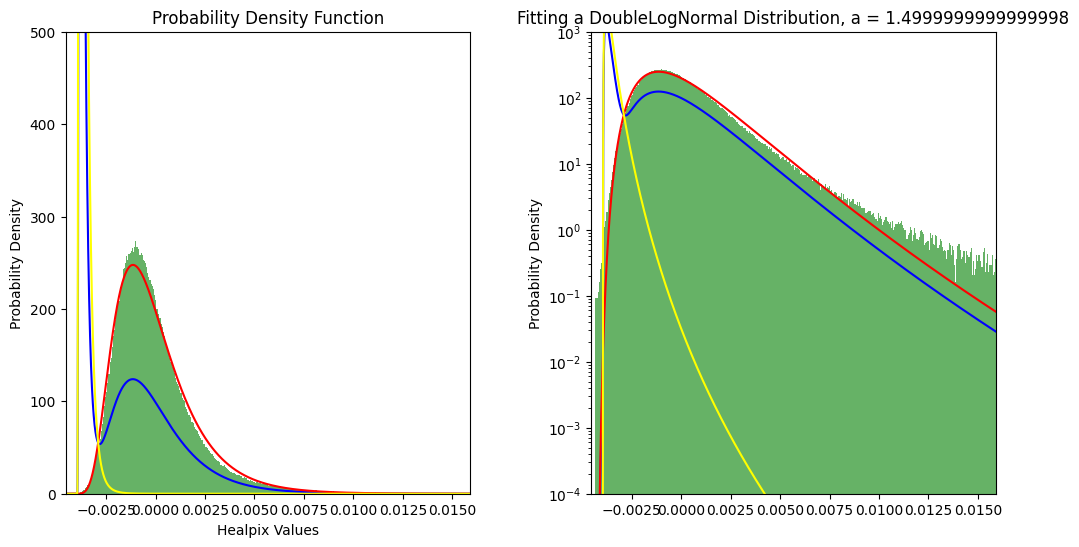

In [34]:
# Change a

alpha = 0.5         # = 1, Normal LogNormal
a = 0.055             # = 1, Normal LogNormal 0.5 to 1.5, intervals of 0.1
epsilon = -0.1      # = 0, Normal LogNormal
a_arr = np.arange(0.5, 1.51, 0.1)

for a in a_arr:

    fig, axes = plt.subplots(1, 2, figsize=(12,6))

    
    axes[0].hist(healpix_map, bins=1500, density=True, alpha=0.6, color='g', label='Original Data')
    axes[1].hist(healpix_map, bins=1500, density=True, alpha=0.6, color='g', label='Original Data')

    # plt.xlabel('Value')
    # plt.ylabel('Frequency')
    
    # Plot the fitted normal distribution
    ymin = -2 * healpix_map.std()
    ymax = 7 * healpix_map.std()
    axes[0].set_xlim(ymin, ymax)
    axes[0].set_ylim(0, 500)
    axes[1].set_xlim(ymin, ymax)
    axes[1].set_ylim(1e-4, 1e3)

    


    new_shift = (1 + epsilon) * optimized_shift
    
    
    K1 = np.linspace(ymin, ymax, 10000)
    y1 = np.log(K1 + optimized_shift)
    P_y1 = np.exp(- ((y1 - optimized_mean) ** 2 / (2 * optimized_std_dev ** 2))) / math.sqrt(2 * math.pi * optimized_std_dev ** 2)
    P_K1 = P_y1 * (1/(K1 + optimized_shift))
    P_K1_nans = np.isnan(P_K1)
    P_K1[P_K1_nans] = 0
    
    K2 = np.linspace(ymin, ymax, 10000)
    y2 = (1/a) * np.log(K2 + new_shift)
    P_y2 = np.exp(- ((y2 - optimized_mean) ** 2 / (2 * optimized_std_dev ** 2))) / math.sqrt(2 * math.pi * optimized_std_dev ** 2)
    P_K2 = P_y2 * (1/(a * (K2 + new_shift)))
    P_K2_nans = np.isnan(P_K2)
    P_K2[P_K2_nans] = 0
    
    # print(P_K1)
    
    P_K = ((1 - alpha) * P_K1) + (alpha * P_K2)
    select_non_nans = ~np.isnan(P_K)

    print('P_K1:', np.trapz(P_K1, K1))
    print('P_K2:', np.trapz(P_K2, K2))
    print('P_K:', np.trapz(P_K, K1))

    axes[0].plot(K1, P_K, color='blue', label='Fitted DoubleLogNormal Distribution')
    axes[0].plot(K1, P_K1, color='red', label='P_K1')
    axes[0].plot(K1, P_K2, color='yellow', label='P_K2')
    axes[0].set_ylabel('Probability Density')
    axes[0].set_title('Probability Density Function')
    
    axes[1].plot(K1, P_K, color='blue', label='Fitted DoubleLogNormal Distribution')
    axes[1].plot(K1, P_K1, color='red', label='P_K1')
    axes[1].plot(K1, P_K2, color='yellow', label='P_K2')
    axes[1].set_ylabel('Probability Density')
    axes[1].set_title('Probability Density Function')
    axes[1].set_yscale('log')
    
    plt.subplots_adjust(wspace=0.3)

    plt.title('Fitting a DoubleLogNormal Distribution, a = ' + str(a))
    axes[0].set_ylabel("Probability Density")
    axes[0].set_xlabel("Healpix Values")

    
    plt.show()
    
    '''
    plt.plot(K1, P_K, color='blue', label='Fitted DoubleLogNormal Distribution')
    plt.plot(K1, P_K1, color='red', label='P_K1')
    plt.plot(K1, P_K2, color='yellow', label='P_K2')
    # plt.yscale("log")
    
    '''

/tmp/ipykernel_548/474492859.py:24: RuntimeWarning: invalid value encountered in log
  y1 = np.log(K1 + optimized_shift)
/tmp/ipykernel_548/474492859.py:31: RuntimeWarning: invalid value encountered in log
  y2 = (1/a) * np.log(K2 + new_shift)


P_K1: 0.9897279975287687
P_K2: 0.9661730338656078
P_K: 0.9779505156971883


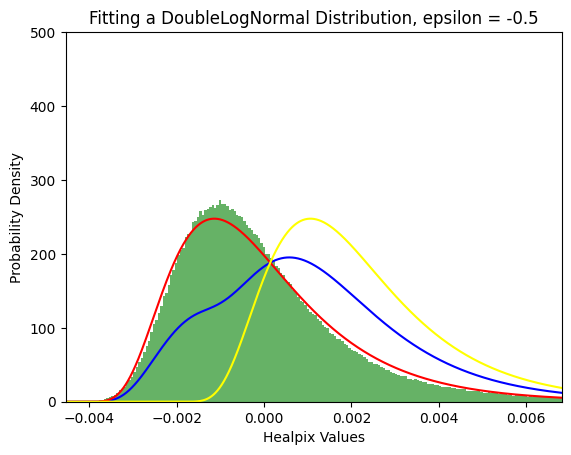

P_K1: 0.9897279975287687
P_K2: 0.9734444466541908
P_K: 0.9815862220914797


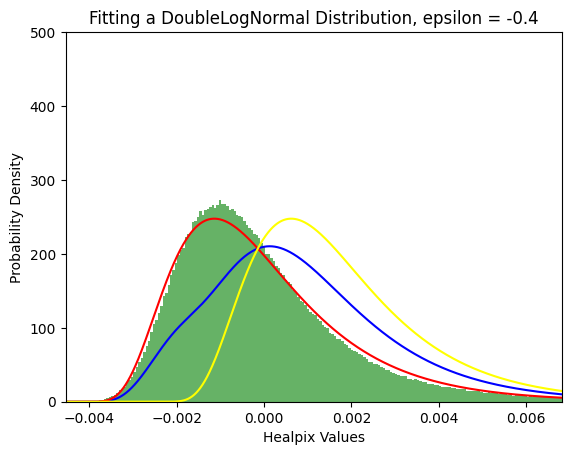

P_K1: 0.9897279975287687
P_K2: 0.9791183153697335
P_K: 0.9844231564492513


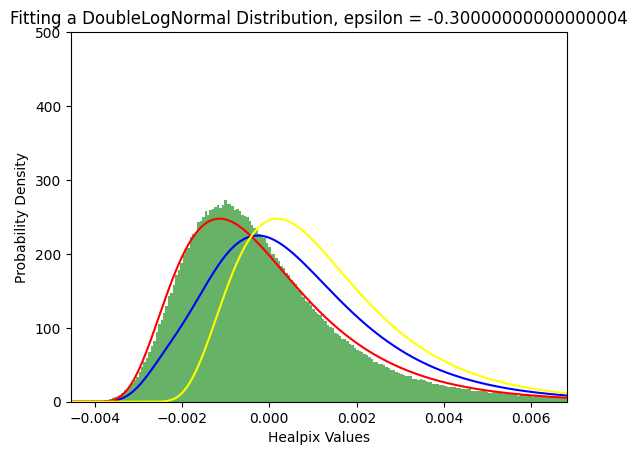

P_K1: 0.9897279975287687
P_K2: 0.9835495245541725
P_K: 0.9866387610414707


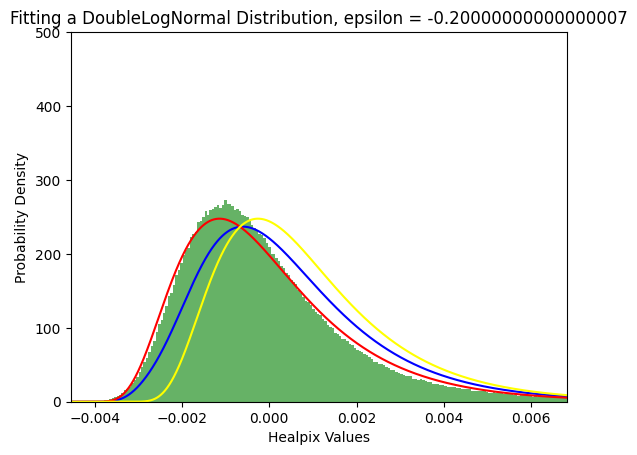

P_K1: 0.9897279975287687
P_K2: 0.9870144961246203
P_K: 0.9883712468266944


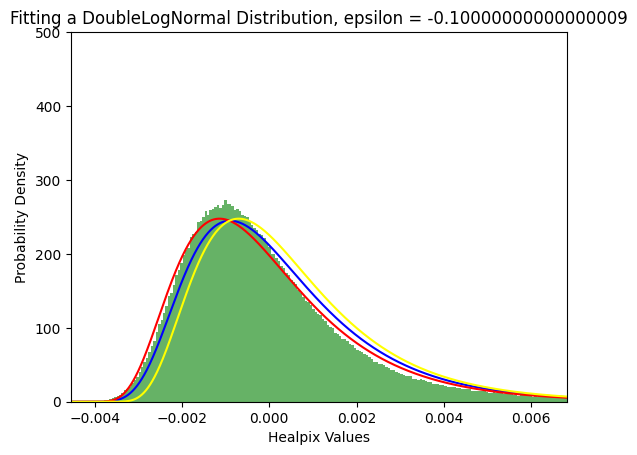

P_K1: 0.9897279975287687
P_K2: 0.9897279975287687
P_K: 0.9897279975287688


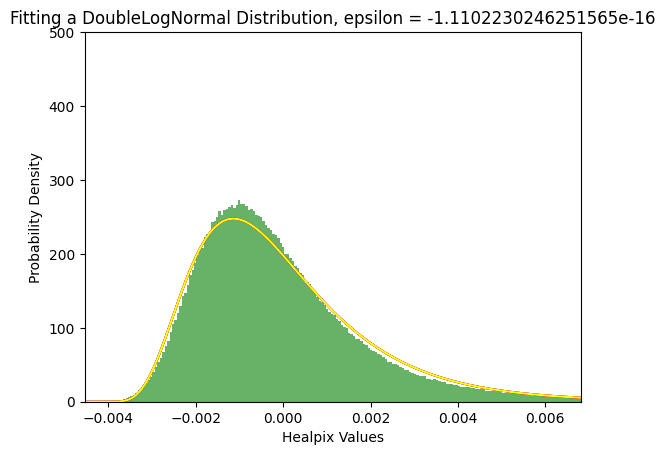

P_K1: 0.9897279975287687
P_K2: 0.9918566493932733
P_K: 0.9907923234610211


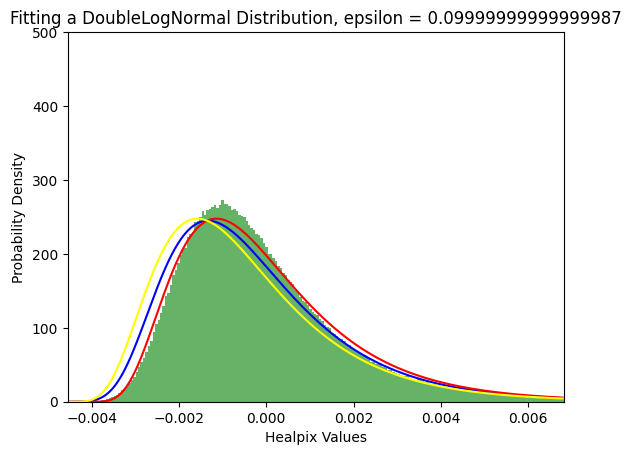

P_K1: 0.9897279975287687
P_K2: 0.9934464359942203
P_K: 0.9915872167614946


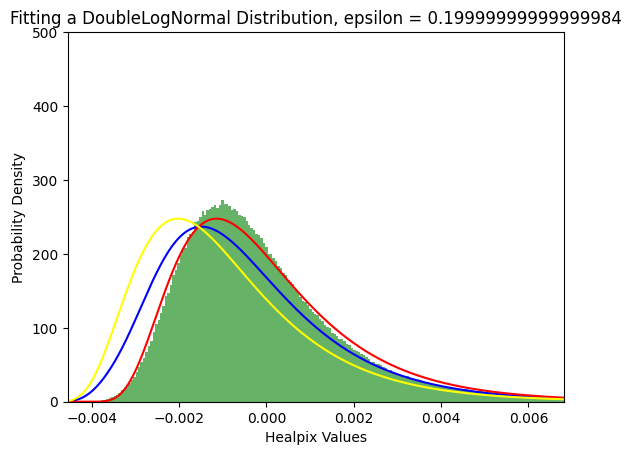

P_K1: 0.9897279975287687
P_K2: 0.9915957244515118
P_K: 0.9906618609901403


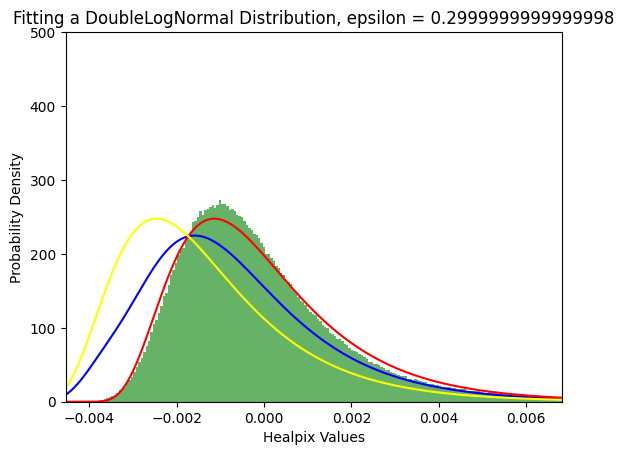

P_K1: 0.9897279975287687
P_K2: 0.9737888785487933
P_K: 0.9817584380387812


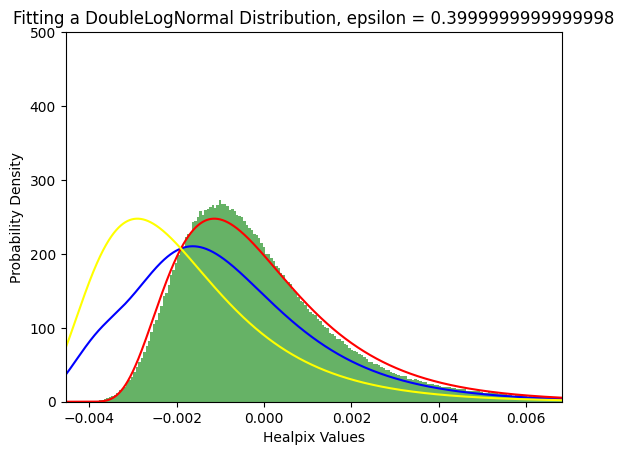

In [8]:
'''

alpha = 0.5
a = 1
epsilon_arr = np.arange(-0.5, 0.50, 0.1)
for epsilon in epsilon_arr:

    plt.hist(healpix_map, bins=1500, density=True, alpha=0.6, color='g', label='Original Data')
    
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
    # Plot the fitted normal distribution
    ymin = -2 * healpix_map.std()
    ymax = 3 * healpix_map.std()
    plt.xlim(ymin, ymax)
    plt.ylim(0, 500)

    


    new_shift = (1 + epsilon) * optimized_shift
    
    
    K1 = np.linspace(ymin, ymax, 10000)
    y1 = np.log(K1 + optimized_shift)
    P_y1 = np.exp(- ((y1 - optimized_mean) ** 2 / (2 * optimized_std_dev ** 2))) / math.sqrt(2 * math.pi * optimized_std_dev ** 2)
    P_K1 = P_y1 * (1/(K1 + optimized_shift))
    P_K1_nans = np.isnan(P_K1)
    P_K1[P_K1_nans] = 0
    
    K2 = np.linspace(ymin, ymax, 10000)
    y2 = (1/a) * np.log(K2 + new_shift)
    P_y2 = np.exp(- ((y2 - optimized_mean) ** 2 / (2 * optimized_std_dev ** 2))) / math.sqrt(2 * math.pi * optimized_std_dev ** 2)
    P_K2 = P_y2 * (1/(a * (K2 + new_shift)))
    P_K2_nans = np.isnan(P_K2)
    P_K2[P_K2_nans] = 0
    
    # print(P_K1)
    
    P_K = ((1 - alpha) * P_K1) + (alpha * P_K2)
    select_non_nans = ~np.isnan(P_K)

    print('P_K1:', np.trapz(P_K1, K1))
    print('P_K2:', np.trapz(P_K2, K2))
    print('P_K:', np.trapz(P_K, K1))

    
    plt.plot(K1, P_K, color='blue', label='Fitted DoubleLogNormal Distribution')
    plt.plot(K1, P_K1, color='red', label='P_K1')
    plt.plot(K1, P_K2, color='yellow', label='P_K2')
    # plt.yscale("log")
    plt.title('Fitting a DoubleLogNormal Distribution, epsilon = ' + str(epsilon))
    plt.ylabel("Probability Density")
    plt.xlabel("Healpix Values")
    plt.show()

'''

/tmp/ipykernel_548/1598147875.py:32: RuntimeWarning: invalid value encountered in log
  y1 = np.log(K1 + optimized_shift)
/tmp/ipykernel_548/1598147875.py:39: RuntimeWarning: invalid value encountered in log
  y2 = (1/a) * np.log(K2 + new_shift)


P_K1: 0.9998658170783669
P_K2: 0.9996469501185636
P_K: 0.9997563835984652


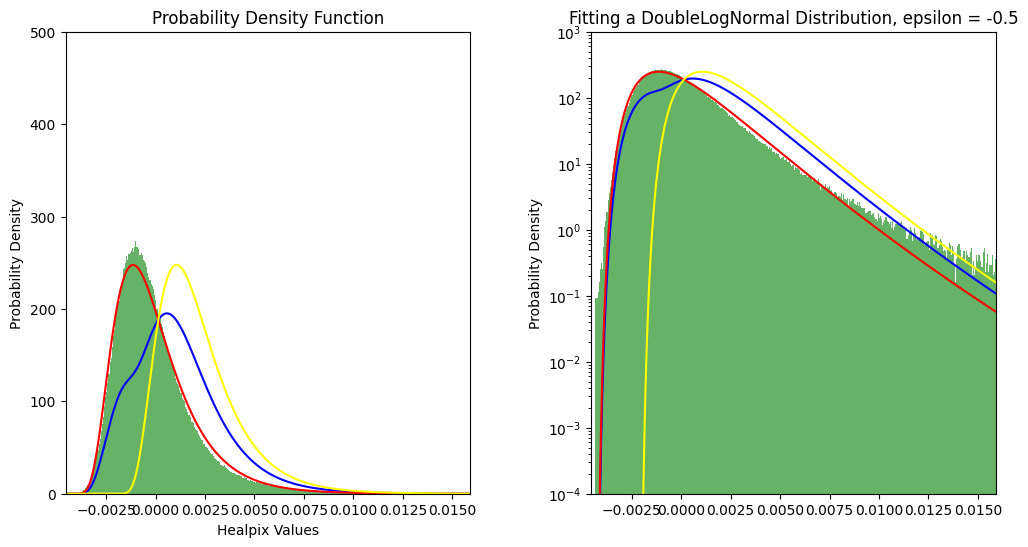

P_K1: 0.9998658170783669
P_K2: 0.9997102001677174
P_K: 0.999788008623042


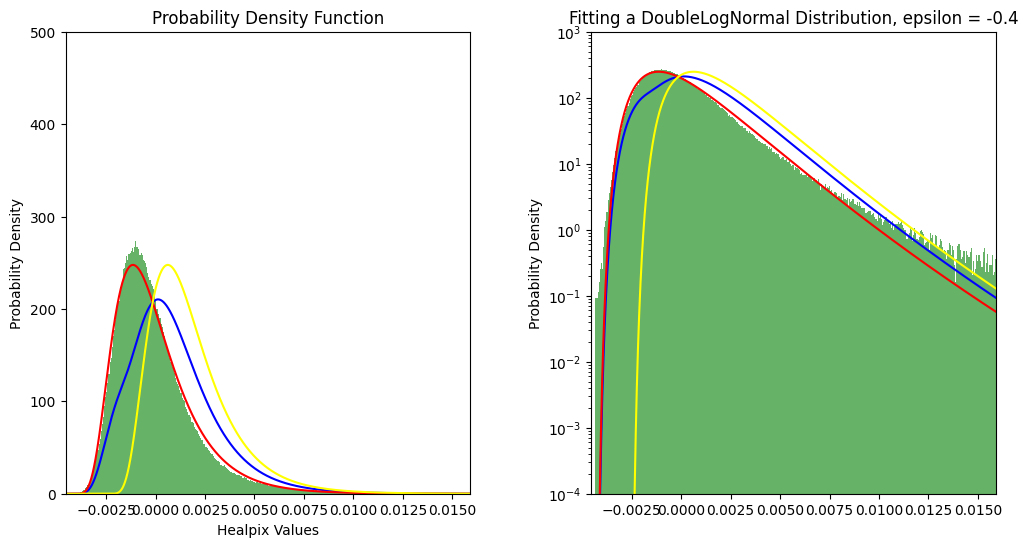

P_K1: 0.9998658170783669
P_K2: 0.9997616414369213
P_K: 0.9998137292576439


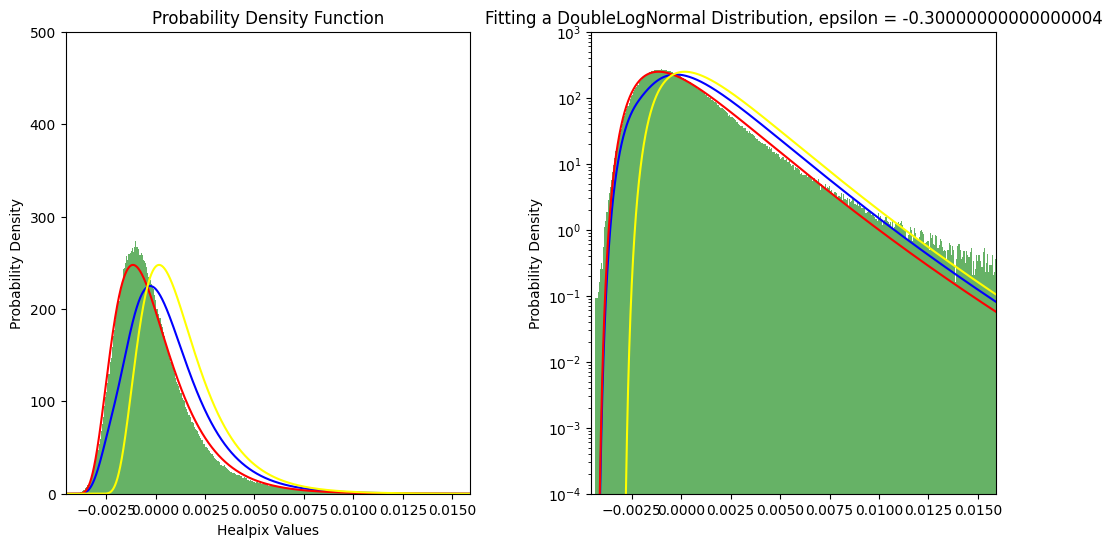

P_K1: 0.9998658170783669
P_K2: 0.9998035651888474
P_K: 0.9998346911336071


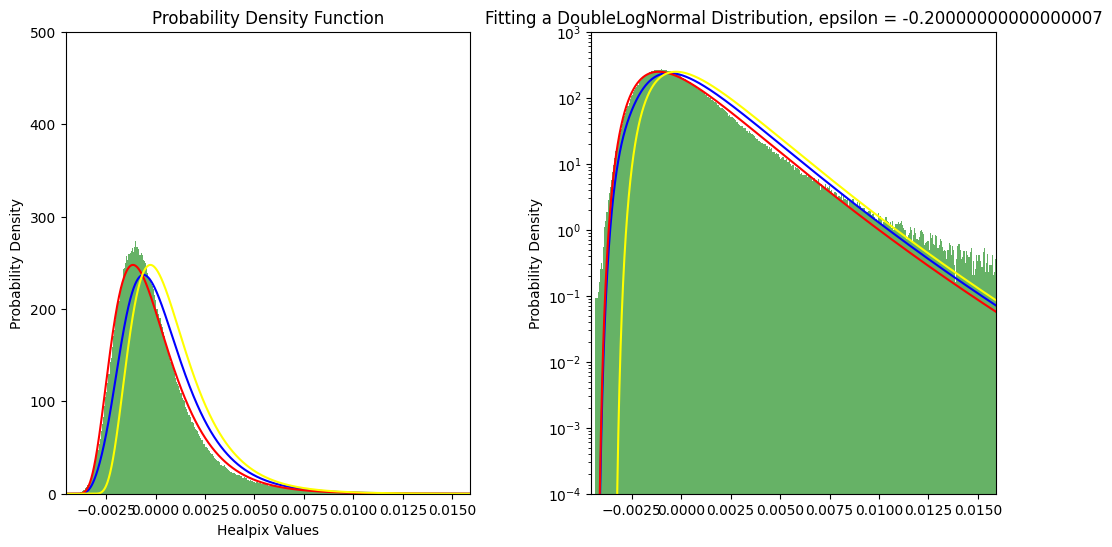

P_K1: 0.9998658170783669
P_K2: 0.9998378019073054
P_K: 0.999851809492836


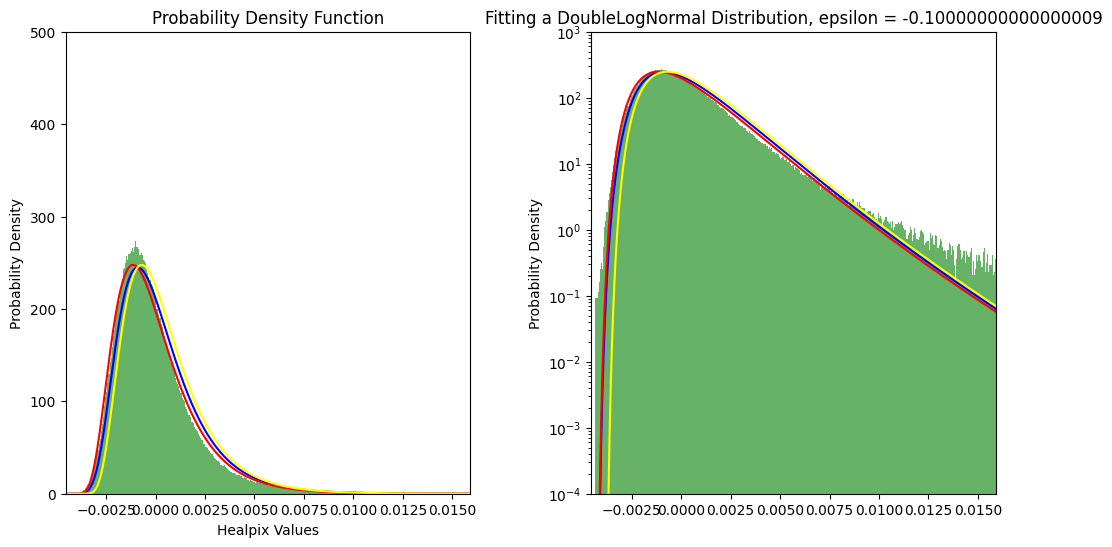

P_K1: 0.9998658170783669
P_K2: 0.9998658170783667
P_K: 0.9998658170783667


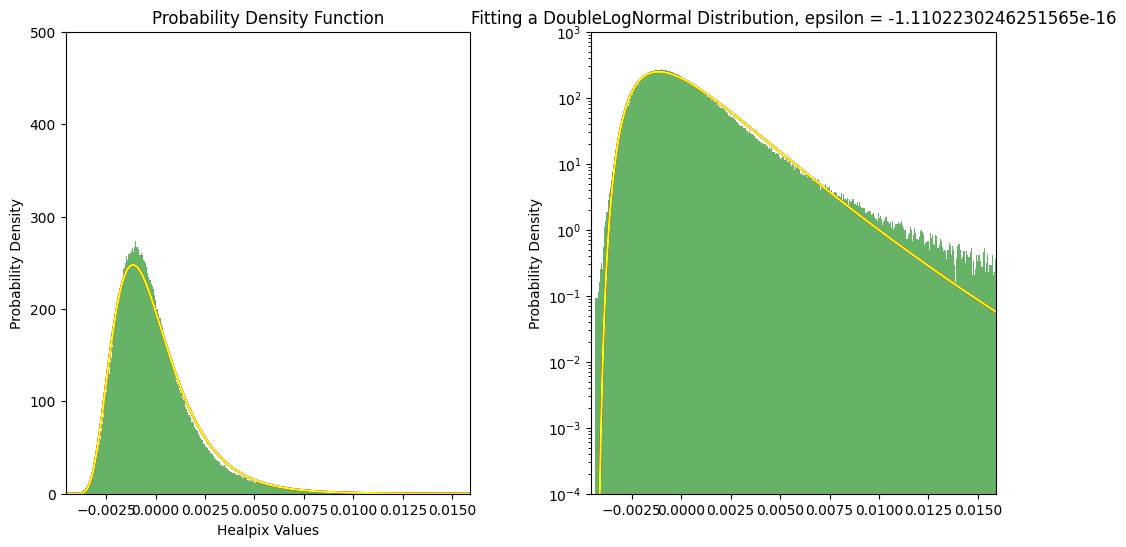

P_K1: 0.9998658170783669
P_K2: 0.9998887828036365
P_K: 0.9998772999410016


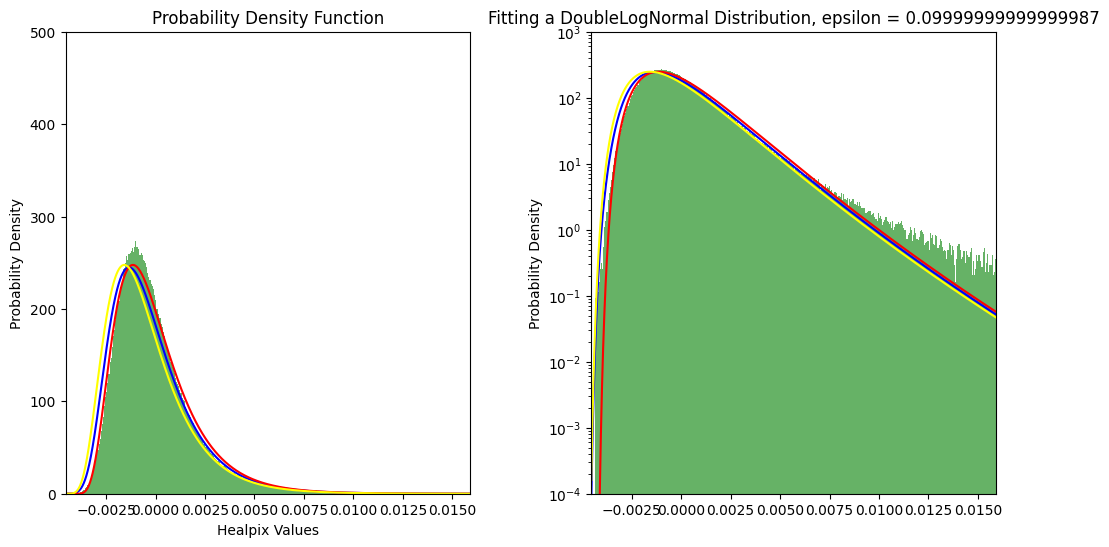

P_K1: 0.9998658170783669
P_K2: 0.9998244333148542
P_K: 0.9998451251966103


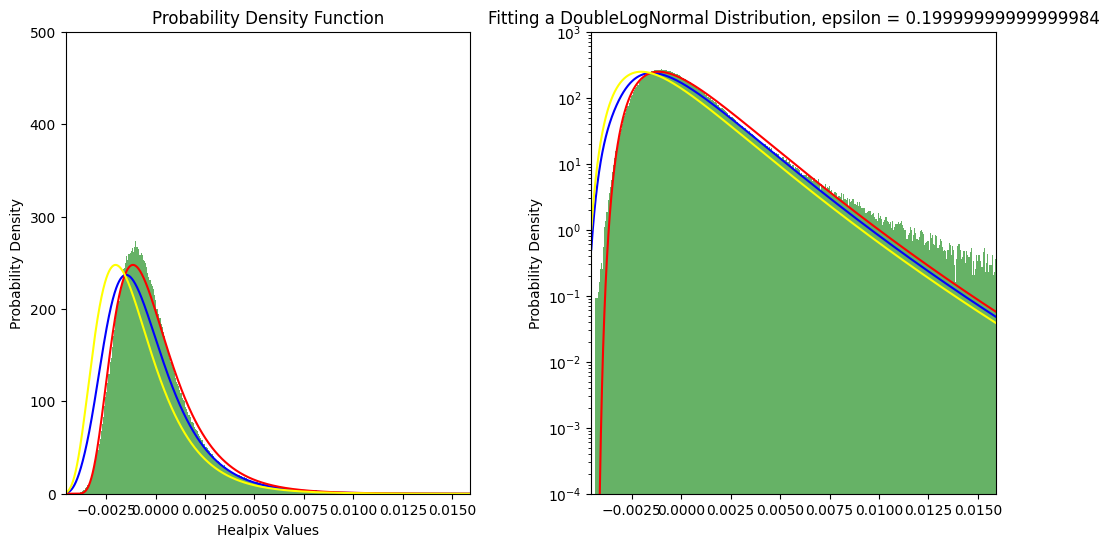

P_K1: 0.9998658170783669
P_K2: 0.9966717131755498
P_K: 0.9982687651269583


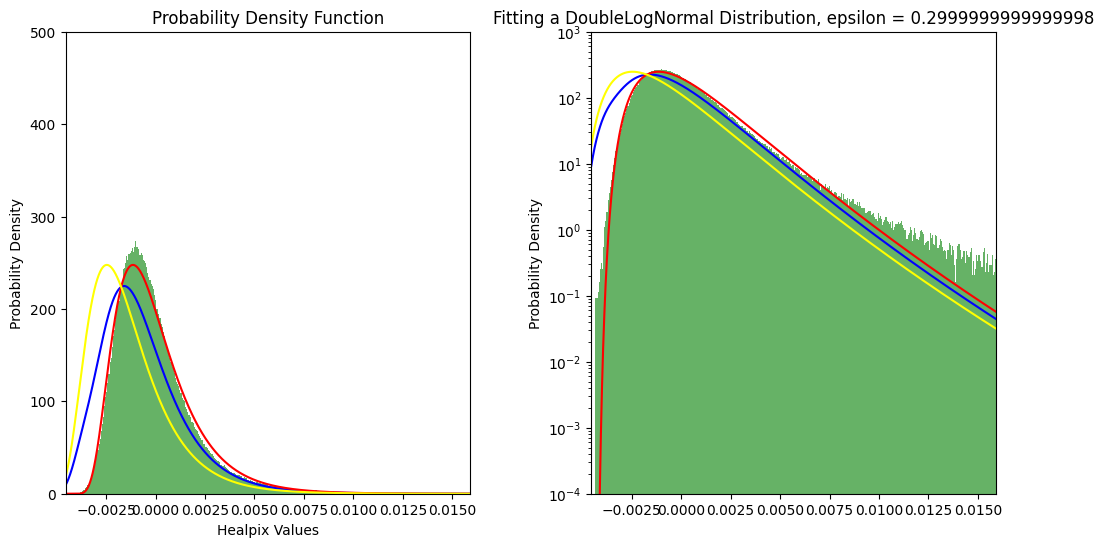

P_K1: 0.9998658170783669
P_K2: 0.9778379035872692
P_K: 0.9888518603328179


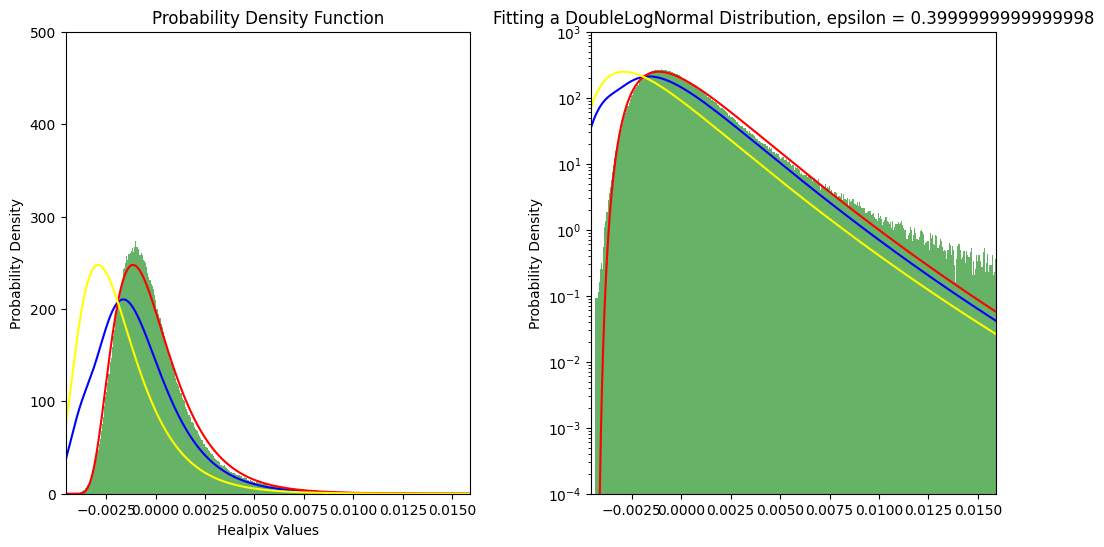

In [33]:
# Change Epsilon i.e. Shift

alpha = 0.5
a = 1
epsilon_arr = np.arange(-0.5, 0.50, 0.1)

for epsilon in epsilon_arr:

    fig, axes = plt.subplots(1, 2, figsize=(12,6))

    
    axes[0].hist(healpix_map, bins=1500, density=True, alpha=0.6, color='g', label='Original Data')
    axes[1].hist(healpix_map, bins=1500, density=True, alpha=0.6, color='g', label='Original Data')

    # plt.xlabel('Value')
    # plt.ylabel('Frequency')
    
    # Plot the fitted normal distribution
    ymin = -2 * healpix_map.std()
    ymax = 7 * healpix_map.std()
    axes[0].set_xlim(ymin, ymax)
    axes[0].set_ylim(0, 500)
    axes[1].set_xlim(ymin, ymax)
    axes[1].set_ylim(1e-4, 1e3)

    


    new_shift = (1 + epsilon) * optimized_shift
    
    
    K1 = np.linspace(ymin, ymax, 10000)
    y1 = np.log(K1 + optimized_shift)
    P_y1 = np.exp(- ((y1 - optimized_mean) ** 2 / (2 * optimized_std_dev ** 2))) / math.sqrt(2 * math.pi * optimized_std_dev ** 2)
    P_K1 = P_y1 * (1/(K1 + optimized_shift))
    P_K1_nans = np.isnan(P_K1)
    P_K1[P_K1_nans] = 0
    
    K2 = np.linspace(ymin, ymax, 10000)
    y2 = (1/a) * np.log(K2 + new_shift)
    P_y2 = np.exp(- ((y2 - optimized_mean) ** 2 / (2 * optimized_std_dev ** 2))) / math.sqrt(2 * math.pi * optimized_std_dev ** 2)
    P_K2 = P_y2 * (1/(a * (K2 + new_shift)))
    P_K2_nans = np.isnan(P_K2)
    P_K2[P_K2_nans] = 0
    
    # print(P_K1)
    
    P_K = ((1 - alpha) * P_K1) + (alpha * P_K2)
    select_non_nans = ~np.isnan(P_K)

    print('P_K1:', np.trapz(P_K1, K1))
    print('P_K2:', np.trapz(P_K2, K2))
    print('P_K:', np.trapz(P_K, K1))

    axes[0].plot(K1, P_K, color='blue', label='Fitted DoubleLogNormal Distribution')
    axes[0].plot(K1, P_K1, color='red', label='P_K1')
    axes[0].plot(K1, P_K2, color='yellow', label='P_K2')
    axes[0].set_ylabel('Probability Density')
    axes[0].set_title('Probability Density Function')
    
    axes[1].plot(K1, P_K, color='blue', label='Fitted DoubleLogNormal Distribution')
    axes[1].plot(K1, P_K1, color='red', label='P_K1')
    axes[1].plot(K1, P_K2, color='yellow', label='P_K2')
    axes[1].set_ylabel('Probability Density')
    axes[1].set_title('Probability Density Function')
    axes[1].set_yscale('log')
    
    plt.subplots_adjust(wspace=0.3)

    plt.title('Fitting a DoubleLogNormal Distribution, epsilon = ' + str(epsilon))
    axes[0].set_ylabel("Probability Density")
    axes[0].set_xlabel("Healpix Values")

    
    plt.show()
    
    '''
    plt.plot(K1, P_K, color='blue', label='Fitted DoubleLogNormal Distribution')
    plt.plot(K1, P_K1, color='red', label='P_K1')
    plt.plot(K1, P_K2, color='yellow', label='P_K2')
    # plt.yscale("log")
    
    '''

/tmp/ipykernel_548/3871549656.py:33: RuntimeWarning: invalid value encountered in log
  y1 = np.log(K1 + optimized_shift)
/tmp/ipykernel_548/3871549656.py:40: RuntimeWarning: invalid value encountered in log
  y2 = (1/a) * np.log(K2 + new_shift)


P_K1: 0.9998658170783669
P_K2: 0.9998378019073054
P_K: 0.9998658170783669


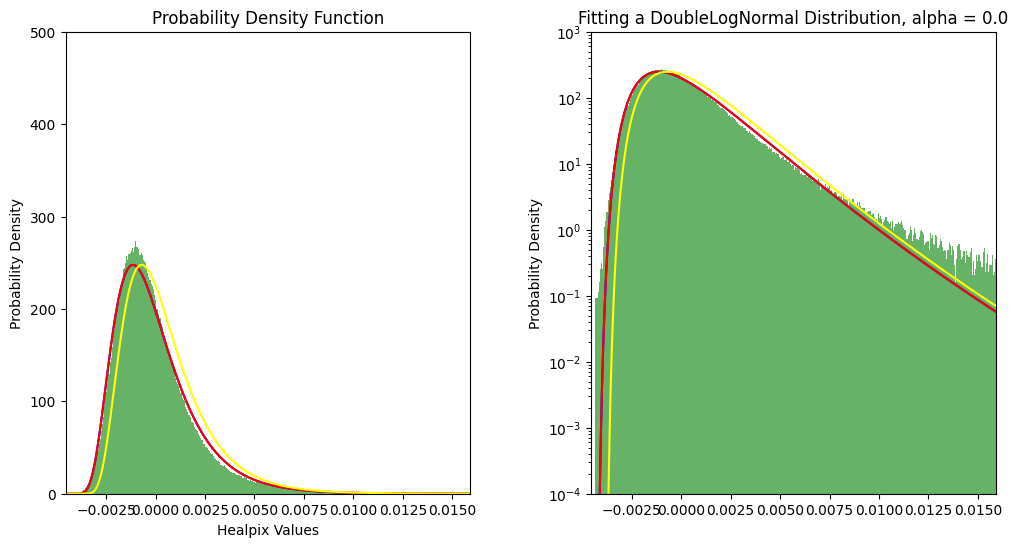

P_K1: 0.9998658170783669
P_K2: 0.9998378019073054
P_K: 0.9998630155612606


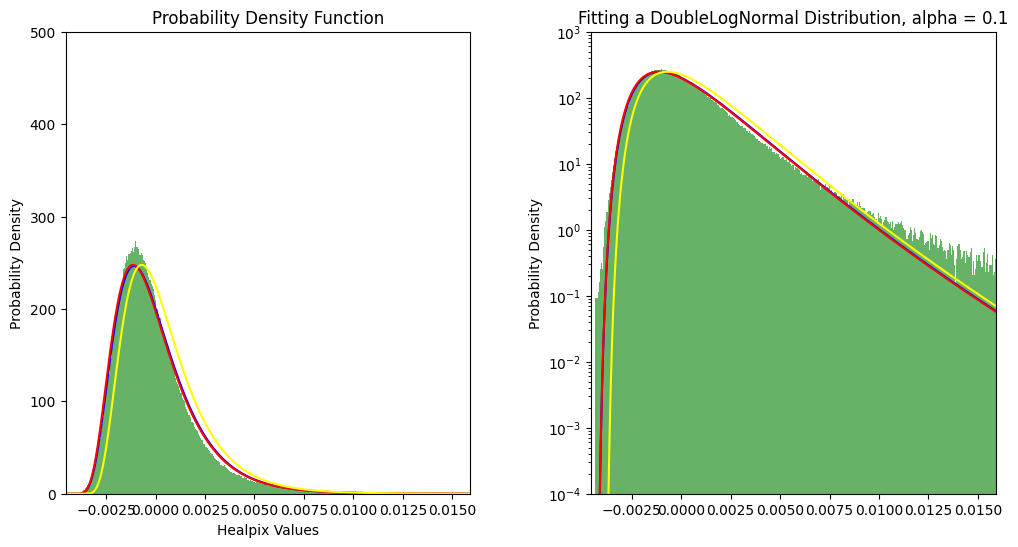

P_K1: 0.9998658170783669
P_K2: 0.9998378019073054
P_K: 0.9998602140441546


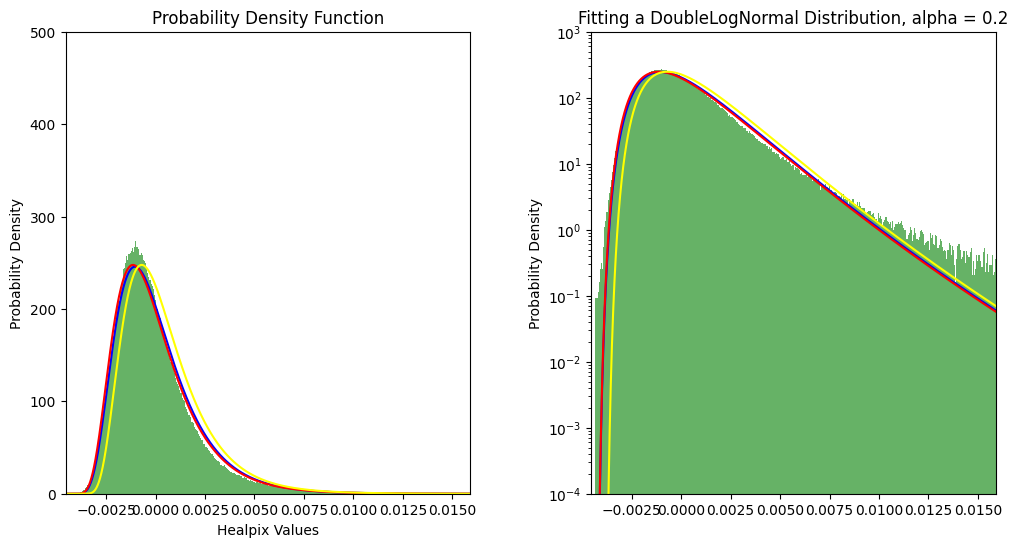

P_K1: 0.9998658170783669
P_K2: 0.9998378019073054
P_K: 0.9998574125270483


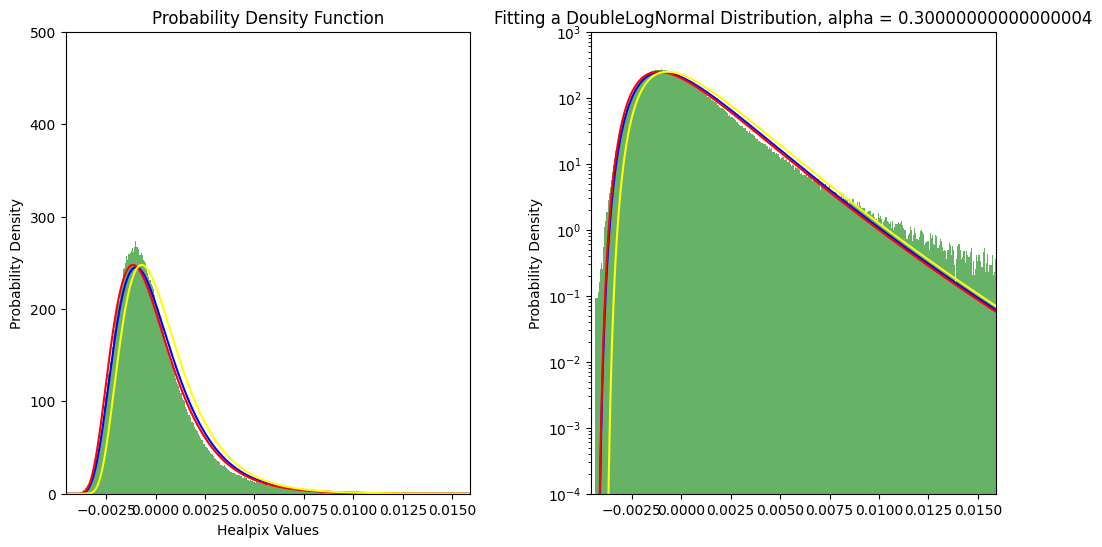

P_K1: 0.9998658170783669
P_K2: 0.9998378019073054
P_K: 0.9998546110099421


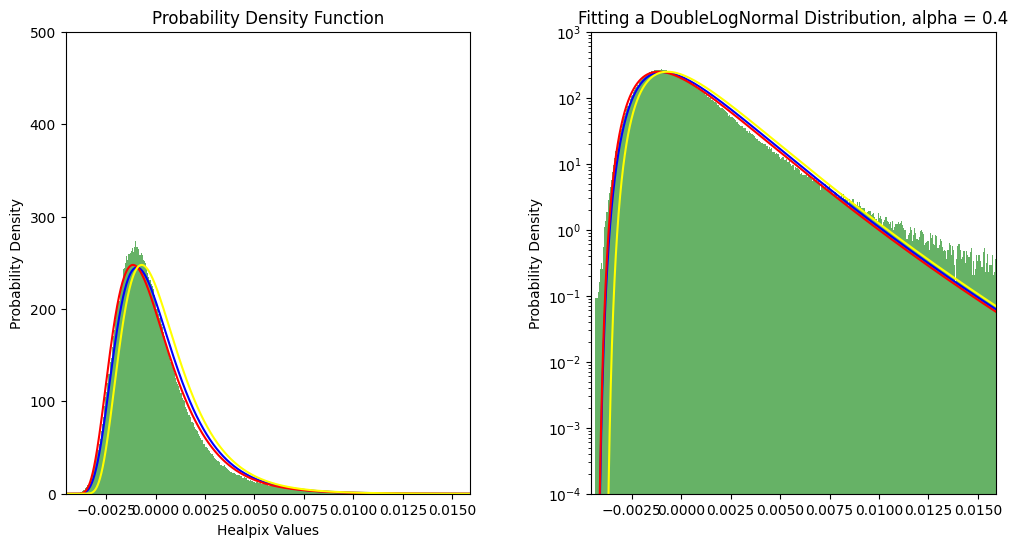

P_K1: 0.9998658170783669
P_K2: 0.9998378019073054
P_K: 0.999851809492836


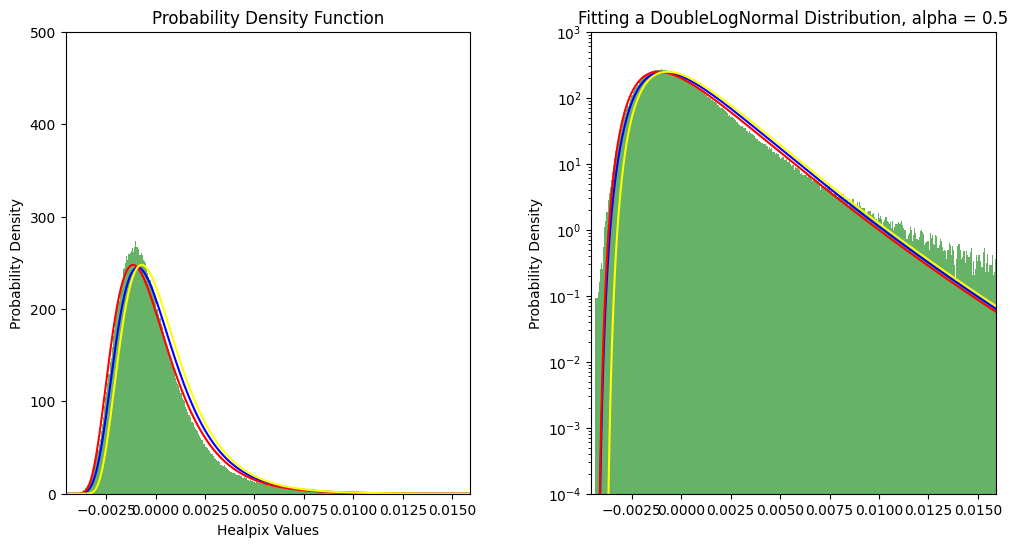

P_K1: 0.9998658170783669
P_K2: 0.9998378019073054
P_K: 0.9998490079757298


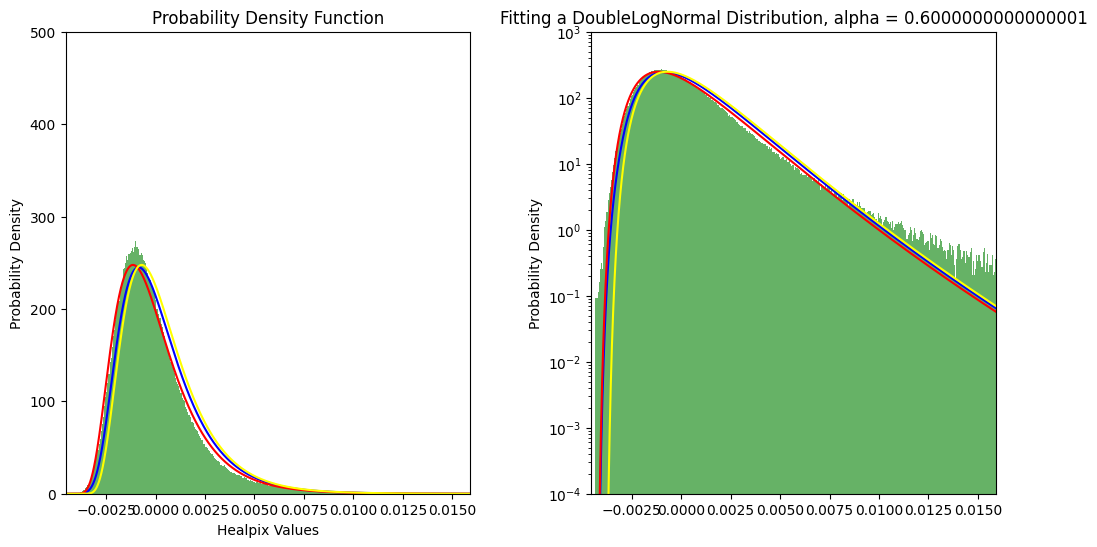

P_K1: 0.9998658170783669
P_K2: 0.9998378019073054
P_K: 0.9998462064586238


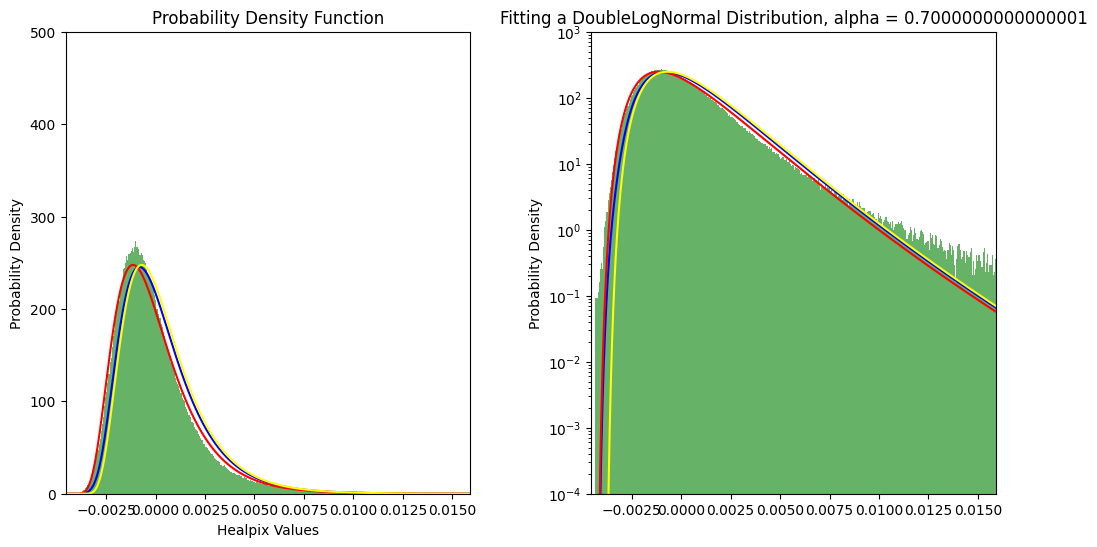

P_K1: 0.9998658170783669
P_K2: 0.9998378019073054
P_K: 0.9998434049415176


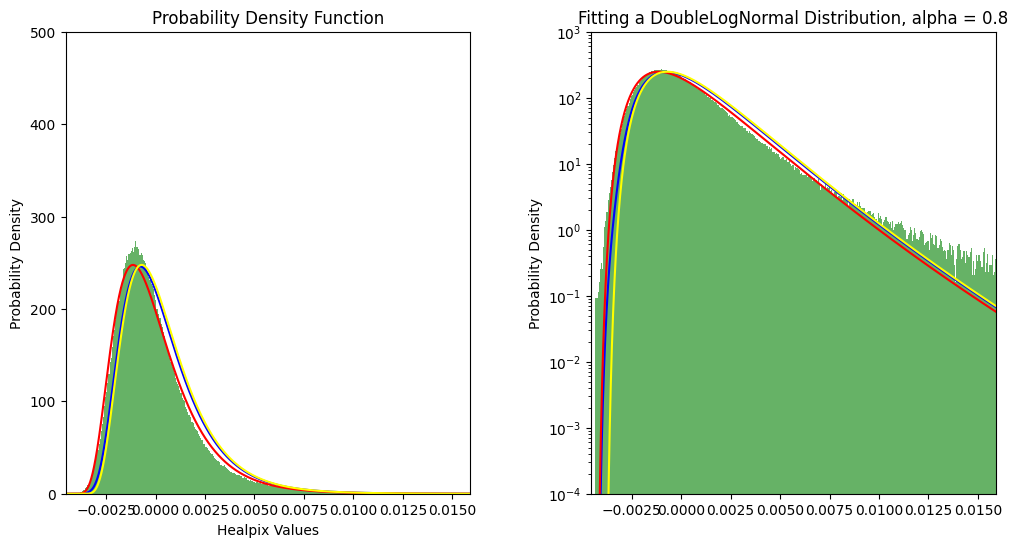

P_K1: 0.9998658170783669
P_K2: 0.9998378019073054
P_K: 0.9998406034244114


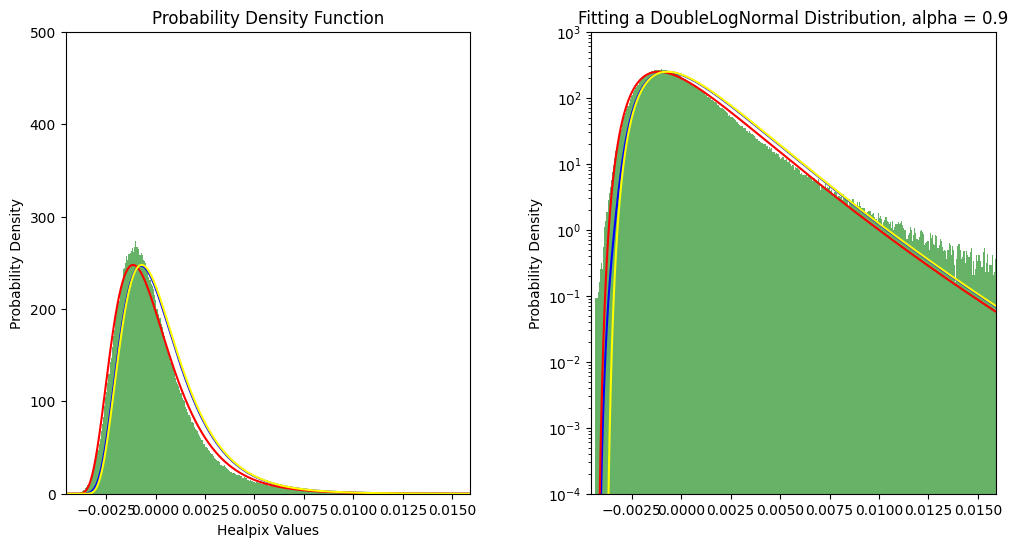

In [36]:
# Change Alpha i.e. Weight

epsilon = -0.1
a = 1
alpha_arr = np.arange(0, 1, 0.1)

for alpha in alpha_arr:

    fig, axes = plt.subplots(1, 2, figsize=(12,6))

    
    axes[0].hist(healpix_map, bins=1500, density=True, alpha=0.6, color='g', label='Original Data')
    axes[1].hist(healpix_map, bins=1500, density=True, alpha=0.6, color='g', label='Original Data')

    # plt.xlabel('Value')
    # plt.ylabel('Frequency')
    
    # Plot the fitted normal distribution
    ymin = -2 * healpix_map.std()
    ymax = 7 * healpix_map.std()
    axes[0].set_xlim(ymin, ymax)
    axes[0].set_ylim(0, 500)
    axes[1].set_xlim(ymin, ymax)
    axes[1].set_ylim(1e-4, 1e3)

    


    new_shift = (1 + epsilon) * optimized_shift
    
    
    K1 = np.linspace(ymin, ymax, 10000)
    y1 = np.log(K1 + optimized_shift)
    P_y1 = np.exp(- ((y1 - optimized_mean) ** 2 / (2 * optimized_std_dev ** 2))) / math.sqrt(2 * math.pi * optimized_std_dev ** 2)
    P_K1 = P_y1 * (1/(K1 + optimized_shift))
    P_K1_nans = np.isnan(P_K1)
    P_K1[P_K1_nans] = 0
    
    K2 = np.linspace(ymin, ymax, 10000)
    y2 = (1/a) * np.log(K2 + new_shift)
    P_y2 = np.exp(- ((y2 - optimized_mean) ** 2 / (2 * optimized_std_dev ** 2))) / math.sqrt(2 * math.pi * optimized_std_dev ** 2)
    P_K2 = P_y2 * (1/(a * (K2 + new_shift)))
    P_K2_nans = np.isnan(P_K2)
    P_K2[P_K2_nans] = 0
    
    # print(P_K1)
    
    P_K = ((1 - alpha) * P_K1) + (alpha * P_K2)
    select_non_nans = ~np.isnan(P_K)

    print('P_K1:', np.trapz(P_K1, K1))
    print('P_K2:', np.trapz(P_K2, K2))
    print('P_K:', np.trapz(P_K, K1))

    axes[0].plot(K1, P_K, color='blue', label='Fitted DoubleLogNormal Distribution')
    axes[0].plot(K1, P_K1, color='red', label='P_K1')
    axes[0].plot(K1, P_K2, color='yellow', label='P_K2')
    axes[0].set_ylabel('Probability Density')
    axes[0].set_title('Probability Density Function')
    
    axes[1].plot(K1, P_K, color='blue', label='Fitted DoubleLogNormal Distribution')
    axes[1].plot(K1, P_K1, color='red', label='P_K1')
    axes[1].plot(K1, P_K2, color='yellow', label='P_K2')
    axes[1].set_ylabel('Probability Density')
    axes[1].set_title('Probability Density Function')
    axes[1].set_yscale('log')
    
    plt.subplots_adjust(wspace=0.3)

    plt.title('Fitting a DoubleLogNormal Distribution, alpha = ' + str(alpha))
    axes[0].set_ylabel("Probability Density")
    axes[0].set_xlabel("Healpix Values")

    
    plt.show()
    
    '''
    plt.plot(K1, P_K, color='blue', label='Fitted DoubleLogNormal Distribution')
    plt.plot(K1, P_K1, color='red', label='P_K1')
    plt.plot(K1, P_K2, color='yellow', label='P_K2')
    # plt.yscale("log")
    
    '''